## Kontinuumsströmungen - Einführung

Im letzten Kapitel haben wir gesehen, dass das Verhalten von Fluiden prinzipiell mit einer Molekulardynamik-Simulation beschrieben werden kann. Die Simulationen sind allerdings sehr aufwändig und nur für mikroskopisch kleine Rechengebiete durchführbar. Um technisch relevante Strömungen simulieren zu können müssen wir den Mikrokosmos verlassen und uns mit den makroskopischen Eigenschaften des Kontinuums, wie Viskosität, Dichte, Druck und Temperatur begnügen.

Bevor wir die relevanten Gleichungen für eine Kontinuumsströmung herleiten, werden wir einige mathematische Grundlagen wiederholen.

### Wiederholung Vektoranalysis

#### Skalarprodukt

Das Skalarprodukt ist definiert als das Produkt der Beträge zweier Vektoren und dem Kosinus des eingeschlossenen Winkels $\varphi$:

$$s = \overrightarrow{v}\cdot\overrightarrow{w} = \vert\overrightarrow{v}\vert \vert \overrightarrow{w}\vert cos \varphi  = v_x w_x + v_y w_y + v_z w_z = \sum_{i=1}^3 v_i w_i = v_i w_i$$

Die Kurzschreibweise nach dem letzten Gleichheitszeichen nennt man [Einsteinsche Summenkonvention](https://de.wikipedia.org/wiki/Einsteinsche_Summenkonvention). Die Konvention bedeutet, dass über doppelt auftretende Indizes summiert wird.

Das Skalarprodukt wird z.B. benötigt, wenn wir die Arbeit berechnen möchten, die eine Kraft entlang eines Weges bewirkt. Das Skalarprodukt sorgt dafür, dass nur der Anteil der Kraft berücksichtigt wird der in Richtung des Weges zeigt:

$$W = \overrightarrow{F}\cdot\overrightarrow{s} = \vert\overrightarrow{F}\vert   cos \varphi \:\vert\overrightarrow{s}\vert = F_s s$$

In Python verwenden wir die Funktion `dot` aus der `Numpy`-Bibliothek, um das Skalarprodukt zu berechnen:

```python
v = np.array([1, 2, 3])
w = np.array([4, 5, 6])
s = np.dot(v, w)
```

#### Dyadisches Produkt

Das dyadische Produkt zweier Vektoren ist wie folgt definiert:

$$\overrightarrow{v}\otimes\overrightarrow{w}=\overrightarrow{v}\overrightarrow{w}^T = v_i w_j = 
\begin{pmatrix}
v_x w_x & v_x w_y & v_x w_z \\
v_y w_x & v_y w_y & v_y w_z \\
v_z w_x & v_z w_y & v_z w_z \\
\end{pmatrix}$$

Es wird z.B. benötigt, um die Konvektionsterme in der Impulsgleichung in Vektorschreibweise darzustellen.

In Python verwenden wir die Funktion `outer` aus der `Numpy`-Bibliothek, um das Dyadische Produkt zu berechnen:

```python
v = np.array([1, 2, 3])
w = np.array([4, 5, 6])
m = np.outer(v, w)
```

#### Gradient eines Skalarfeldes

Der Gradient eines Skalarfeldes (z.B. ein Druckfeld) ergibt ein Vektorfeld, das in Richtung des steilsten Anstiegs des Skalarfelds weist.

$$\text{grad}~s = \nabla s = \frac{\partial s}{\partial x_i} = 
\begin{pmatrix}
\frac{\partial s}{\partial x} \\
\frac{\partial s}{\partial y} \\
\frac{\partial s}{\partial z} \\
\end{pmatrix}$$

In Python verwenden wir die Funktion `gradient` aus der `Numpy`-Bibliothek, um den Gradient zu berechnen.

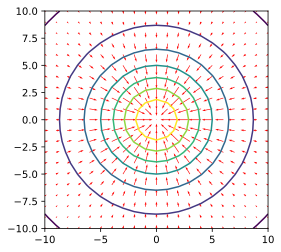

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

x = y = np.linspace(-10.,10.,21)
xi, yi = np.meshgrid(x, y, indexing='ij')
s = 2/(1 + (xi**2 + yi**2)/(5**2))

grads= np.gradient(s)
dhdx = grads[0]
dhdy = grads[1]

fig = plt.figure(figsize=(4, 4))
plt.quiver(xi, yi, dhdx, dhdy, color='r',
          angles='xy', scale_units='xy')
plt.contour(xi, yi, s);

#### Gradient eines Vektorfeldes

In der Fluidmechanik (z.B. in den Navier-Stokes-Gleichungen) wird häufig auch der Gradient eines Vektorfeldes benötigt:

$$\text{grad}~\overrightarrow{v} = \nabla \overrightarrow{v} = \nabla \otimes\overrightarrow{v} =  \frac{\partial v_i}{\partial x_j} = 
\begin{pmatrix}
\frac{\partial v_x}{\partial x} & \frac{\partial v_x}{\partial y} & \frac{\partial v_x}{\partial z} \\
\frac{\partial v_y}{\partial x} & \frac{\partial v_y}{\partial y} & \frac{\partial v_y}{\partial z} \\
\frac{\partial v_z}{\partial x} & \frac{\partial v_z}{\partial y} & \frac{\partial v_z}{\partial z}\\
\end{pmatrix}$$

Hintergrund ist die Fragestellung, wie groß die Änderung $\text{d}\overrightarrow{v}$ des Vektorfeldes ist, wenn wir uns um den infinitesimalen Vektor $\text{d}r$ fortbewegen. Genau wie bei einem Skalar, ist die Änderung (das Totale Differential):

$$\text{d}\overrightarrow{v}=\frac{\partial \overrightarrow{v}}{\partial x}\text{d}x + \frac{\partial \overrightarrow{v}}{\partial y}\text{d}y + \frac{\partial \overrightarrow{v}}{\partial z}\text{d}z$$

oder mit dem Vektor $\text{d}\overrightarrow{r} = \text{d}x \overrightarrow{e}_x + \text{d}y \overrightarrow{e}_y + \text{d}z \overrightarrow{e}_z$:

$$\text{d}\overrightarrow{v} = \left(\overrightarrow{e}_x \text{d}x +  \overrightarrow{e}_y \text{d}y +  \overrightarrow{e}_z \text{d}z \right)\cdot \left(\overrightarrow{e}_x \frac{\partial}{\partial x} +  \overrightarrow{e}_y \frac{\partial}{\partial y} +  \overrightarrow{e}_z \frac{\partial}{\partial z} \right) \overrightarrow{v}$$

$$\text{d}\overrightarrow{v} = \text{d}\overrightarrow{r}\cdot\nabla\overrightarrow{v} = \left(\text{d}\overrightarrow{r}\cdot\nabla\right)\overrightarrow{v}$$

Für den Ausdruck $\nabla \otimes\overrightarrow{v}$ allein, der sog. Dyade, gibt es leider keine anschauliche geometrische Bedeutung.

#### Divergenz eines Vektorfeldes

Die Divergenz eines Vektorfelds ergibt ein Skalarfeld, aus dem man ablesen kann, ob und wo es im Vektorfeld Quellen (positive Divergenz) oder Senken (negative Divergenz) gibt:

$$\text{div}~\overrightarrow{v} = \nabla \cdot \overrightarrow{v} = \frac{\partial v_x}{\partial x} + \frac{\partial v_y}{\partial y} + \frac{\partial v_z}{\partial z} = \frac{\partial v_i}{\partial x_i}$$

Leider gibt es in Python bzw. Numpy keine vorgefertigte Divergenz-Funktion. Wir müssen diese also über einen kleinen Umweg berechnen:

In [ ]:
def div2d(x,y,u,v):
    return ((np.diff(u,axis=1)/np.diff(x,axis=1))[:-1,:] 
            + (np.diff(v,axis=0)/np.diff(y,axis=0))[:,:-1])

Im folgenden Beispiel wird die Divergenz einer Punktquelle berechnet und grafisch dargestellt:

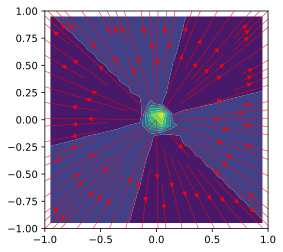

In [137]:
x = y = np.linspace(-1.,1.,21)
xi, yi = np.meshgrid(x, y)

ui = xi / (xi**2 + yi**2 + 1e-30)
vi = yi / (xi**2 + yi**2 + 1e-30)

divergence = div2d(xi, yi, ui, vi)

fig = plt.figure(figsize=(4, 4))

plt.contourf(xi[:-1,:-1]+0.05, yi[:-1,:-1]+0.05, divergence)
plt.streamplot(xi, yi, ui, vi, color='r', linewidth=0.5);

#### Rotation eines Vektorfeldes

Die Rotation eines Vektorfeldes ist durch das Kreuzprodukt des Nabla-Operators mit dem Vektorfeld definiert:

$$\text{rot}~\overrightarrow{v} = \nabla \times \overrightarrow{v} = \begin{pmatrix}
\frac{\partial v_z}{\partial y} - \frac{\partial v_y}{\partial z} \\
\frac{\partial v_x}{\partial z} - \frac{\partial v_z}{\partial x} \\
\frac{\partial v_y}{\partial x} - \frac{\partial v_x}{\partial y} \\
\end{pmatrix}$$

In Python gibt es keine vorgefertigte Funktion zur Berechnung der Rotation. Wir basteln uns deshalb selbst eine (hier für 2D):

In [192]:
def curl2d(x, y, u, v):
    return ((np.diff(v,axis=1)/np.diff(x,axis=1))[:-1,:] 
            - (np.diff(u,axis=0)/np.diff(y,axis=0))[:,:-1])

Als Beispiel verwenden wir das Vektorfeld

$$\overrightarrow{v} = 
\begin{pmatrix}
0 \\
x \\
0 \\
\end{pmatrix},$$

so dass sich die Rotation zu

$$\text{rot}~\overrightarrow{v} = 
\begin{pmatrix}
0 \\
0 \\
1 \\
\end{pmatrix}$$

ergibt. D.h. die Rotation ist im gesamten Feld konstant und steht senkrecht auf der $x$-$y$-Ebene.

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


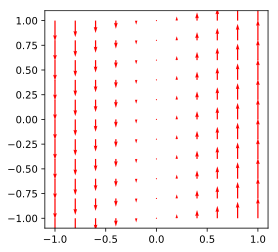

In [198]:
x = y = z = np.linspace(-1.,1.,11)
xi, yi = np.meshgrid(x, y)

ui = np.zeros_like(xi)
vi = xi

fig = plt.figure(figsize=(4, 4))
plt.quiver(xi, yi, ui, vi, color='r');

rotv = curl2d(xi, yi, ui, vi)
print(rotv)

#### Substantielle Ableitung (Eulersche und Lagrangesche Betrachtung)

Die absolute Änderung einer Größe $\phi$, die ein im Strömungsfeld mitbewegter Beobachter sieht setzt sich zusammen aus der Änderung von $\phi$ mit der Zeit und der Änderung von $\phi$ mit dem Ort. Mathematisch ausgedrückt:

$$\underbrace{\frac{\text{D}\phi}{\text{D} t}}_{\substack{\text{Änderung, die ein} \\ \text{mitbewegter Beobachter} \\ \text{sieht}}} = \underbrace{\frac{\partial \phi}{\partial t}}_{\substack{\text{Änderung} \\ \text{mit der Zeit}}} + \underbrace{\overrightarrow{v}\cdot \nabla \phi}_{\substack{\text{Änderung} \\ \text{mit dem Ort}}} = \frac{\partial \phi}{\partial t} + v_i \frac{\partial \phi}{\partial x_i}$$

$\phi$ kann sowohl ein Skalar (z.B. die Temperatur) als auch ein Vektor (z.B. die Geschwindigkeit) sein.

Als Beispiel betrachten wir einen See, dessen Temperatur sich durch Sonneneinstrahlung um 3 K/s erhöht. Außerdem ist die Temperatur im See nicht überall gleich, sondern abhängig vom Ort. Insgesamt kann die Temperatur wie folgt beschrieben werden:

$$\phi = T(x,y,z) = 300 \text{K} + 1 \frac{\text{K}}{\text{m}}\cdot x + 2 \frac{\text{K}}{\text{m}}\cdot y + 3 \frac{\text{K}}{\text{s}}\cdot t$$

Ein ortsfester Beobachter würde an jeder Stelle des Sees eine Temperaturänderung

$$\frac{\partial \phi}{\partial t} = 3 \frac{\text{K}}{\text{s}}$$

sehen. Ein Beobachter, der sich z.B. in einem Boot mit der Geschwindigkeit $\overrightarrow{v} = 
\begin{pmatrix}
3 \\
1 \\
\end{pmatrix} \frac{\text{m}}{\text{s}}$ über den See bewegt würde jedoch folgende Änderung detektieren:

$$\frac{\text{D}\phi}{\text{D} t} = 3 \frac{\text{K}}{\text{s}} + \begin{pmatrix}
3 \\
1 \\
\end{pmatrix} \frac{\text{m}}{\text{s}} 
\cdot 
\begin{pmatrix}
1 \\
2 \\
\end{pmatrix} \frac{\text{K}}{\text{m}} = 3 \frac{\text{K}}{\text{s}} + (3\cdot 1+ 1\cdot 2) \frac{\text{K}}{\text{s}} = 8 \frac{\text{K}}{\text{s}}$$

Diese Betrachtungsweise nennt man auch [Langrangesche Betrachtungsweise](https://de.wikipedia.org/wiki/Lagrangesche_Betrachtungsweise). 

[Hier](TFD - 3.2 Kontinuumsstroemungen - Navier-Stokes-Gleichungen.ipynb) geht es weiter mit den Navier-Stokes-Gleichungen.


---
###### Copyright (c) 2017, Matthias Stripf

Der folgende Python-Code darf ignoriert werden. Er dient nur dazu, die richtige Formatvorlage für die Jupyter-Notebooks zu laden.

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open('TFDStyle.css', 'r').read()
    return HTML(styles)
css_styling()